###Logistic Regression

Similarly to the case of linear regression, the logistic regression, which is used for classification, has a hypothesis $h$ and a cost function $J$. In the case of linear regression, the hypothesis was $ h= h(\theta; x^{(i)}) = \theta^t x^{(i)} $ with $\theta$ the column vector representing the weights and bias of the model and $x^{(i)}$ the i-th column vector with the features of the model. In particular, for a total of $n$-features, $x^{(i)} \in \mathbb{R}^{n+1}$, because we include an extra element $x_0=1$ that is associated with the bias $\theta_0$. For logistic regression,the hypothesis is slightly ajusted with the application of a function $g$ which is not the identity function as the case of linear regression. Specifically, $h= h_{g}(\theta; x^{(i)}) = g(\theta^t x^{(i}),$ with $g$ defined by $g(z) = \frac{1}{1 + e^{-z}}$, which is called logistic function or sigmoid funtion, where $z$ will be real numbers written in the form of the hypothesis. As before, capital $X$ will denote the design matrix, which is made of rows $(x^t)^{(i)}$. Thus, $X \in \mathbb{R}^{(m, n+1)}$ and $\theta \in  \mathbb{R}^{(n+1, 1)}$  is a matrix as well. In fact, logistic regression model is a type of a generalised linear models and that is behind the reason for having some similarities to linear regression. 
However, the cost function will no longer be the quadratic one, because logistic regression is based upon the fact that we want a hypothesis with values between zero and one only, similarly to a probability, which is bounded below by zero and above by one. While the logistic sigmoid is not a probability distribution, it is associated with a probability distribution (the logistic distribution) and it can be seem as a conditional probability for a given random variable. Based on principles of maximum likelihood, the cost function is shown to be a convex combination given by
$$J(\theta) = \frac{1}{m} \left[ \sum_{i=1}^{m} -y^{(i)}\ln h^{(i)} - (1 - y^{(i)})\ln (1 - h^{(i)})  \right]  $$
where $h^{(i)}$ simply denotes the hypothesis function evaluated with the i-th example from the dataset, meaning we use the simpler notation $h^{(i)} = g(\theta^t x^{(i)})$ ommiting the dependence on the function $g$.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
path ='/content/drive/MyDrive/Machine_Learning_DS/Material/ML_Standford/ex2-octave/ex2data1.txt'


data = pd.read_csv( path, header=None , names=['Exam1-score', 'Exam2-score', 'Approval'] )

m = len(data['Approval'])  #number of training values
x = np.array([data['Exam1-score'], data['Exam2-score']])   #capital X will be with x0s included...
y = np.array(data['Approval'])


#y = data['Approval'].to_numpy().reshape(m,1)


In [ ]:
data.head(7)

,Exam1-score,Exam2-score,Approval
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1


In [ ]:
print( x.shape, y.shape)

(2, 100) (100,)


In [ ]:
x = x.T
y = y.reshape(m,1)
print(x.shape, y.shape)

(100, 2) (100, 1)


In [ ]:
m, n = x.shape  # m examples and n features
x[:7]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588]])

In [ ]:
#four quartile and 5 point summary
data.describe()

,Exam1-score,Exam2-score,Approval
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


#Vizualize the data

Note: where(...)
    where(condition, [x, y])
    Return elements chosen from `x` or `y` depending on `condition`.
    When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses.

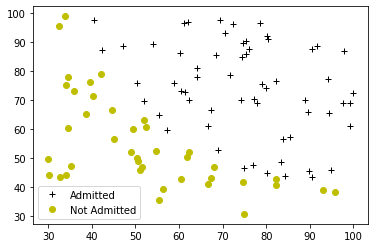

In [ ]:
#note that: pos = np.where(y==1, y, 5) would give same size array with
# y where y=1 and 5 otherwise. But we want only to select the rows of y where y==1
pos = np.where(y==1)[0] #positive result 1
neg = np.where(y==0)[0]       # negative result 0


plt.plot(x[pos,0], x[pos,1], 'k+', label='Admitted'  )
plt.plot(x[neg,0], x[neg,1], 'yo', label='Not Admitted')
plt.legend()
plt.show()

In [ ]:
#Note that we only want the 1st element [0] of the tuple below
#to filter the row numbers  of x
print(np.where(y==0))


(array([ 0,  1,  2,  5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35,
       36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67,
       70, 78, 79, 86, 89, 92]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [ ]:
print(neg)
type(neg)

[ 0  1  2  5 10 11 14 17 20 22 23 27 28 29 32 34 35 36 38 39 41 43 44 45
 53 54 55 57 61 62 63 64 65 67 70 78 79 86 89 92]


numpy.ndarray

In [ ]:
#the plot above works well since the dimensions are compatible
print( x[pos,0].shape, x[pos,1].shape)
print( x[neg,0].shape, x[neg,1].shape)

(60,) (60,)
(40,) (40,)


#Cost function and gradient

The vectorization of the cost function will be implemented by the following matricial product 
$$ J(\theta) = \frac{1}{m} \left[ -y^t \ln h - (1 - y^t)\ln(1-h) \right],$$
where $h$ is a matrix defined by $h = h_g  = g( X\theta) $ and $g$ is the sigmoid function. One needs to be careful to make sure the marix multiplication are done properly.

Regarding the process of using gradient descent to minimize the cost function, logistic regression will give a similar expression for the derivative $\frac{\partial J}{\partial \theta}$ to the case of linear regression with the difference that the hypothesis is not the same. Thus, gradient descent in logistic regression is not unfamiliar after learning about it in the context of linear regression. However, there are other optimization methods to be used, and gradient descent/ascent can be substituted. We will use another method for this time. 


In [ ]:
#Lets now use the extended vector x including the intercept theta0
#for which x0=1 
X = np.array([np.ones(m), x[:,0], x[:,1]]).T
#X = np.append(np.ones((m,1)), x, axis=1) #alternatively 

print(X.shape)
X[:3]

(100, 3)


array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803]])

In [ ]:
#we need to apply a sigmoid function to create the hypothesis.
# oir case is a binary classification as only two features.

def sigmoid(s):
  return 1/(1 + np.exp(-s))

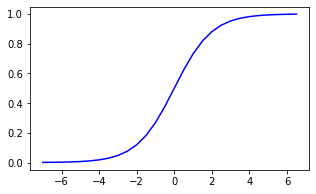

In [ ]:
#How does it look like
# values are mapped into 0, 1 and in between

values = np.arange(-7,7, step=0.5)
fig, ax = plt.subplots(figsize=(5,3))
plt.plot(values, sigmoid(values), 'b')
plt.show()

In [ ]:
#The cost function is not quadratic anymore
# Note: theta first argument because we will use an optimization method
#that takes first argument as variable only.
def cost_function(theta, X, y):
  """Calculate the cost function for logistic regression """
  global m
  #m = len(y) #alternatively
  h = sigmoid(np.dot(X, theta))   #hypothesis adjusted from linear regression (identity>>sigmoid)
  cost = 1/m * ( -y.T @ np.log(h) -(1 - y.T)@ np.log(1-h) )
  return cost


 

#Conjugate gradient and optimization method
can be obtained by solving the linear equation
$Ax = b$ where A will be the gradient that minimize the function $f = \frac{1}{2} x^tAx - x^tb.$

Its advantage using optimization algoriths is that we do not need to set a learning parameter $\alpha$ and is usually faster numerics.

In [ ]:
#We know the gradient of our cost function wrt parameters theta 
#instead of ascendent gradient (maximizing a function -log) we use the 
#conjugate gradient method
def gradient(theta, X, y):
  h = sigmoid(np.dot(X, theta))
  m = len(y)
  #theta = theta.reshape((n,1))  in case theta is given as an array instead matrix
  grad = 1/m *  np.dot(X.T, (h-y))
  return grad


In [ ]:
#test calculating cost and its gradient for
n = X.shape[1]
#n = np.size(X,1)  #note that np.size(X) =100 rows*3 columns = 300
theta = np.zeros((n,1)) # theta needs to include de bias theta0 and be a column

cost_function(theta, X, y).shape

(1, 1)

In [ ]:
print(f'The value of cost function for this theta \n {theta} \n is J = {cost_function(theta, X,y)}.')
print('-'*50)
print(f'The value of gradient for this theta \n {theta} \n is gradient \n {gradient(theta, X, y)}')
#print('the gradient values are', grad )

The value of cost function for this theta 
 [[0.]
 [0.]
 [0.]] 
 is J = [[0.69314718]].
--------------------------------------------------
The value of gradient for this theta 
 [[0.]
 [0.]
 [0.]] 
 is gradient 
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


#Learning Parameters with the gradient

fminunc was used in Octave/Matlab and it alllows to provide the gradient or not. In Python, Scipy has the optimize with options such as fmin_tnc (truncated Newton or Newton Conjugate-Gradient) or minimize that has some algorith methods available.

See SciPy doc.
For unconstrained minimization, we can use, for example: Method CG uses a nonlinear conjugate gradient, Method Newton-CG uses a Newton-CG algorithm(also known as the truncated Newton method) for large scale, Method trust-exact is a trust-region method for unconstrained minimization in which quadratic subproblems are solved almost exactly (It is, in many situations, the Newton method to converge in fewer iterations and the most recommended for small and medium-size problems.)
'`scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)`'

The objective function to be minimized.
`fun(x, *args) -> float`
where x is an 1-D array with shape (n,) and args is a tuple of the fixed parameters needed to completely specify the function.


In [ ]:
from scipy import optimize

# def cost_function(theta, X, y):
#   """Calculate the cost function for logistic regression """
#   global m
#   #m = len(y) #alternatively
#   h = sigmoid(X @ theta)   #hypothesis adjusted from linear regression (identity>>sigmoid)
#   cost = 1/m * ( -y @ np.log(h) -(1 - y)@ np.log(1-h) )
#   return cost

# def gradient(theta, X, y):
#   h = sigmoid(np.dot(X, theta))
#   m = len(y)
#   #theta = theta.reshape((n,1))  in case theta is given as an array instead matrix
#   grad = 1/m *  np.dot(X.T, (h-y))
#   return grad.reshape((n,))

#It is enough to reshape y and theta, as .dot() is flexible with dimensions

theta= theta.reshape((n,))
y= y.reshape((m,))

result = optimize.minimize(cost_function, theta, args=(X,y), method='Newton-CG',
                  jac = gradient, options={'maxiter': 400, 'disp':True } )

theta_min = result['x']


print(f' the minimum is achieved with theta = {theta_min} ')
print(f' It shall, however, be expressed as a column \n {(theta_min).reshape((n,1))} ')


#restart the original shapes
y= y.reshape((m,1))
theta = (theta_min).reshape((n,1))

#note: jac is Jacobian. Give the method; our gradient function defined above.
#it should be a function that returns the gradient vector:
#jac(x, *args) -> array_like, shape (n,)
#where x is an array with shape (n,) and args is a tuple with the fixed parameters.

#args is a tuple of the fixed parameters needed to completely specify the function.
#maxiter for maximum iterations
#disp for printing convergence messages

# returns: The optimization result represented as a OptimizeResult object. 
#Important attributes are: x the solution array, success a Boolean flag indicating 
#if the optimizer exited successfully and message which describes the cause of the termination. 


#alternatively
#result2 = optimize.fmin_tnc(func= cost_function, x0= theta, fprime=gradient, args= (X, y) )


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 28
         Function evaluations: 72
         Gradient evaluations: 237
         Hessian evaluations: 0
 the minimum is achieved with theta = [-25.15970745   0.20621852   0.20145863] 
 It shall, however, be expressed as a column 
 [[-25.15970745]
 [  0.20621852]
 [  0.20145863]] 


#Plotting the decision boundary

Note that the hypothesis assumes values between zero
and one rather than only zero and one. A fair point to decide what is likely 1 or likely 0 is the middle point 0.5. Thus, if the $h_{\theta}(X) = g(X\theta) \geq 0.5$, namely, $X\theta \geq 0$, then the answer is likely a positive outcome (True).
Otherwise, if $X\theta \leq 0$, the hypothesis tends towards a False outcome, where $g$ is the logistic function.
Specifically, the boundary lies at $\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$ 

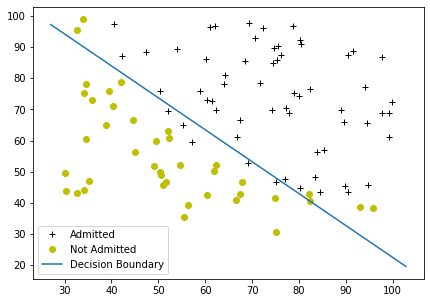

In [ ]:
#The decision boundary can be plot to separete the data
#into two subspaces corresponding to True (y=1) and False (y=0) values



#first plot the data again
pos = np.where(y==1)[0] #positive result 1
neg = np.where(y==0)[0]       # negative result 0

#Note that this time we are using the extended X containing 1's due to intercept
plt.figure(figsize= (7,5) )
plt.plot(X[pos,1], X[pos,2], 'k+', label='Admitted'  )
plt.plot(X[neg,1], X[neg,2], 'yo', label='Not Admitted')
plt.legend()


#now the decision boundary
#Here theta needs to be the theta_min reshaped to columns as originally
theta = (theta_min).reshape((n,1))
y= y.reshape((m,1))

#select min and max points of the data for feature 1 (plus +-3 a bit of extra space)
xpart = np.array([ min(X[:,1])-3  ,  max(X[:,1])+3 ]) 

#NumPy supports smart elementwise operations so we do not really need
#to take care of the elementwise operations  such as 1./theta[]
#where we would divide a number by a matrix but elementwise  
#same would work with 1/theta[]

ypart = -1./(theta[2])* (theta[0] + xpart* theta[1]   )

plt.plot(xpart, ypart, label='Decision Boundary')
plt.legend()
plt.show()

 #else:                               #for matrices of type (MxN)
  # features1 = np.linspace(-1,1.5,100)
  # features2 = np.linspace(-1,1.5,100)
  # Z = 
  # U, V = np.meshgrid(features1, features, )  

  # plt.contour(U, V, Z)






In [ ]:
data.std()

Exam1-score    19.458222
Exam2-score    18.582783
Approval        0.492366
dtype: float64

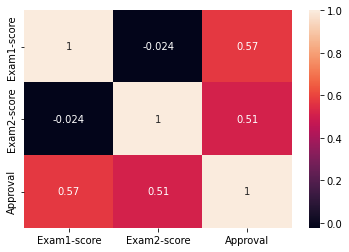

In [ ]:
#How does the correlation help to understand the predictions?

sns.heatmap(data.corr(), annot=True)
#newdata = data.copy()
# newdata['x0'] = pd.Series(np.ones(100))
# col = newdata.columns
# col = ['x0', 'Exam1-score', 'Exam2-score', 'Approval' ]
# newdata = newdata[col]
# newdata.head()

In [ ]:
#Let us see if this linear correlation has anything to do with our predictions below.
#Note that Exam-1 has a slightly higher positive correlation (0.57) w.r.t the approval rate than the Exam-2 (0.51).

#Prediction and accuracies

Predict what is the probability that a student will be admitted based on their score on exam1 and exam2.
Particularly, for the case in which exam1 = 45 and exam2 = 85.Let also see the inverse situation: exam1 = 85 and exam2 = 45

In [ ]:
#x0=1, exam1 = 45 and exam2 = 85. what is the probability of a pass?
prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print(f'The student with 45 on first exam and 85 on the second has the \n \
admission probability of {float(prob)}')

The student with 45 on first exam and 85 on the second has the 
 admission probability of 0.7762785784829798


In [ ]:
#x0=1, exam1 = 85 and exam2 = 45. what is the probability of a pass?
prob = sigmoid(np.array([1, 85, 45]).dot(theta))
print(f'The student with 85 on first exam and 45 on the second has the \n \
admission probability of {float(prob)}') 
#which is a slightly better result than previosu case, in agreement with
#the expectation from the correlation values found above. 

The student with 85 on first exam and 45 on the second has the 
 admission probability of 0.8076023649827495


Now, for accuracy, we need to see how the model do in comparison with the given data with target y.
A comparison between the hypothesis and the real values. Any value greater or equal 0.5 is leaning towards a True, otherwise it is a False.

In [ ]:
def predic(theta, X):
  """Given predictors and parameters, find the prediction for the target """
  m = np.size(X,0)
  p = np.zeros((m,1))
  for (i, value) in enumerate(X):
    prob = sigmoid(np.dot(value, theta))
    if prob >= 1/2:
      p[i] = 1
    else:
      p[i] = 0  
  return p   

 ## alternatively: 
  # prob = sigmoid(np.dot(X, theta))
  # for i in range(m): 
  #   if prob[i] >= 0.5:
  #     p[i] = 1
  #   else:
  #     p[i] = 0  
  # return p       

In [ ]:
print(f'The train accuracy is { np.mean(predic(theta, X )== y )*100}%')

The train accuracy is 89.0%


#Comparison
While we used the logistic regression algorith together with an optimization method for the gradient, we can also use Scikit-learn library for comparing the results. 

In [ ]:
from sklearn.linear_model import LogisticRegression
#y = y.flatten()
#create a linear regression object and train the model with training set
#be default, intercept (bias) is taken into account. lets use x then
lreg = LogisticRegression()
lreg = lreg.fit(x,y)

lreg.score(x, y)

lreg_acc = lreg.score(x, y) * 100

print('The coefficients are: \n', lreg.coef_)
print(lreg.intercept_)
print(f'Accuracy is {lreg_acc}')
#in agreement with our results


The coefficients are: 
 [[0.20535491 0.2005838 ]]
[-25.05219314]
Accuracy is 89.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
#y = y.flatten()
#Lets use our extended vector X and remove sklearn bias
lreg = LogisticRegression(fit_intercept=False)
lreg = lreg.fit(X,y)

lreg.score(X, y)
lreg_acc = lreg.score(X, y) * 100


print('The coefficients are: \n', lreg.coef_)
print(f'Accuracy is {lreg_acc}')
#print(lreg.intercept_)
#The result is different from what we found before.
#Also the accuracy is smaller, but this is a training set anyway..
#That is probably the automatic regularization from sklearn
#lets adjust that


The coefficients are: 
 [[-3.9000297   0.03844761  0.03102019]]
Accuracy is 87.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##hyperparameter C 
is related to the regularization: 
"C float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization."
While regularization takes care of overfiting, C controls the flexibility of the model.
Hence, to reduce the regularization, C must be large.


In [ ]:
#larger C will reduce regularization
from sklearn.linear_model import LogisticRegression
#y = y.flatten()
lreg = LogisticRegression(fit_intercept=False, C=10000)
lreg = lreg.fit(X,y)

lreg.score(X, y)
lreg_acc = lreg.score(X, y) * 100


print('The coefficients are: \n', lreg.coef_)
print(f'Accuracy is {lreg_acc}')
#print(lreg.intercept_)
#The result is in agreement again!


The coefficients are: 
 [[-25.07741347   0.20556053   0.20079246]]
Accuracy is 89.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Regularized Logistic Regression

It is not always possible to have a simple line decision boundary separating the data into two subspaces corresponding to the binary cases True and False, but the inclusion of higher powers polynomial terms on the features x1 and x2, such as their quadratic combinatios, allows the incorportaion of more complex decision boundaries. That will increase the complexity of the model and possibly cause overfitting. Hence, a good idea is to use regularization to make sure the model will not be susceptible to overfitting. Lets see that.

"Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model."

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
path2 = '/content/drive/MyDrive/Machine_Learning_DS/Material/ML_Standford/ex2-octave/ex2data2.txt'
data2 = pd.read_csv(path2, header=None, names=['Test1', 'Test2', 'Approval'])

m = len(data2['Approval'])  #number of training values

data2.head()


,Test1,Test2,Approval
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
data2.describe() #5-points summary 

,Test1,Test2,Approval
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [ ]:

x = np.array([data2['Test1'], data2['Test2']])   #capital X will be with x0s included...
y = np.array(data2['Approval'])

print( x.shape, y.shape)

(2, 118) (118,)


In [ ]:
x = x.T
y = y.reshape(m,1)  #a column vector
print(x.shape, y.shape)


(118, 2) (118, 1)


In [ ]:
m, n = x.shape  # m examples and n features
x[:7]

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ],
       [-0.52477 ,  0.2098  ],
       [-0.39804 ,  0.034357]])

#Visualisation 


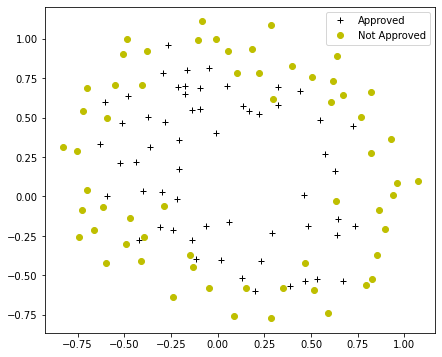

In [ ]:
#Still we have 2 features 1 and x2, so we can plot these against the value of the target y.
#note that: pos = np.where(y==1, y, 7) would give same size array with
# y where y=1 and 7 otherwise. But we want only to select the rows of y where y==1
pos = np.where(y==1)[0] #positive result 1
neg = np.where(y==0)[0]       # negative result 0

plt.figure(figsize=(7,6))
plt.plot(x[pos,0], x[pos,1], 'k+', label='Approved'  )
plt.plot(x[neg,0], x[neg,1], 'yo', label='Not Approved')
plt.legend()
plt.show()


As mentioned before, a shape that could probably fit this data dividing the plane into two regions
has a curvature similar of a circle (which has a power-two polynomial equation on the plane).
That means we need at least power two on our features to try to fit this shape
solution: construct a map feature that will take polynomial terms out of x1 and x2. 
example: up to the 6th order!

NOTE: if we start with a column vector of ones, we need to horizontally stack more columns
to form the matrix M. previously, X was made of columns 1s, x1 and x2. But now, we need to include
other columns such as x1^2, x1x2, x2^2,.... hstack will do that.
Note also that there is a contraint between the power of x1 (index: i) and power of x2 (index: j)
namely: i + j = degree. If i is free to change in a given range,
j needs to be bounded by i. That means j will depend on i, and  i is bounded by the maximum chosen degree.
if we start with a column of ones, i=0 is not needed, and we can start with i=1,....  

In [ ]:
def mapFeature(x1, x2, degree):
  """Given features x1 and x2 as columns of same size, it returns all polynomial terms up to the chosen degree """
  
  #for multi feature plot in terms of x1 ad x2, we will pass x1 and x2
  #that are not numpy arrays (ndarray), but floats, which can cause problems with operations
  #such as the len() (if it is a float or int, it has no lenght) or even power ** (because of lack of broadcasting)
  #this can be solved by enforcing x1 and x2 are numpy arrays and same size!
  if (type(x1)== list) | (type(x2)==list ):
    raise TypeError('That will not work with lists')

  if type(x1) != np.ndarray:
    x1 = np.array([x1])
  if type(x2)  != np.ndarray:
    x2 = np.array( [x2] )  
     
#it does not include lists since a x1 list would become a matrix '[[...]]'
#to include mistakes such as x1 and x2 given as lists
#include nested conditional 'ifs' for x1 and x2: 
#if type(x1) = list:
# x1 = np.array()

 
  out  = np.ones( (len(x1),1) )  #start with a column of ones
 

  for i in range(1, degree+1): # 1<= i <= degree(including)
    for j in range(i+1):       # 0<= j <= i (including)   
       poly = (x1 ** (i-j) * x2**j  ).reshape( (len(x1),1) )  #binomial terms. reshaped to match column vector
       
       out = np.hstack( (out, poly)  )    #horizontal stack (new columns)
  
  return out

X = mapFeature(x[:,0], x[:,1], 6 )  #extended X contains 1s and more features
#note that x[:,0].shape is (118,)  which is not a column vector

#check that the first column is indded made out of ones
X[:,0]






array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
m, n = X.shape #updating size values with extended X



#Cost function and its gradient

To avoid overfitting, a regularization term will be added to the previous cost function and the new cost function is, therefore, a regularized cost function. Regularization is parametrized by $\lambda$, but the bias $\theta_0$ asscociated with x0=1 is excluded from the regularization term since there is no overfitting associated with the bias.

In [ ]:
def sigmoid(s):
  return 1/(1 + np.exp(-s))



In [ ]:
#The cost function is the previous one plus a regularization
# Note: theta first argument because we will use an optimization method
#that takes first argument as variable only.
def cost_functionReg(theta, X, y, LAMBDA):           #'lambda' is reserved...
  """Calculate the regularized cost function for logistic regression"""
  m = len(y)
  #global m                      # m = X.shape[0]
  h = sigmoid(np.dot(X, theta))   #hypothesis adjusted from linear regression (identity>>sigmoid)
  
  regularization = LAMBDA/(2*m) * np.transpose(theta[1:]   ) @ theta[1:]
  cost = (1/m) * ( -y.T @ np.log(h) -(1 - y.T)@ np.log(1-h) )
  regcost = cost + regularization
  return  regcost

 

In [ ]:
#We know the gradient of our cost function wrt parameters theta 
#instead of ascendent gradient (maximizing a function -log) we use the 
#conjugate gradient method
def gradientReg(theta, X, y, LAMBDA):
  h = sigmoid(np.dot(X, theta))
  m = len(y)
  #theta = theta.reshape((n,1))  in case theta is given as an array instead matrix
  grad_regularization = (LAMBDA/m) * theta
  grad_regularization[0] = 0                # set the regularization term to zero for theta0 = theta[0]
  grad_usual = (1/m) *  np.dot(X.T, (h-y))
  reggrad = grad_usual + grad_regularization
  return reggrad

In [ ]:
#For initial thetas at zero. Choose LAMBDA=1 and a initial theta made  of zeros
LAMBDA = 1
theta = np.zeros((n,1))   #column vector such that n=len(theta)
print(f'For lambda={LAMBDA} and this choice of theta \n {theta.flatten()} \n the cost function is {cost_functionReg(theta, X, y, LAMBDA)}  ' ) 
print('-'*50)
print(f'And the first components of the associated regularized gradient reads \n {gradientReg(theta, X, y, LAMBDA)[:5]}   ')

For lambda=1 and this choice of theta 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] 
 the cost function is [[0.69314718]]  
--------------------------------------------------
And the first components of the associated regularized gradient reads 
 [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]   


In [ ]:
#test
LAMBDA = 10
theta = np.ones((n,1))   #column vector such that n=len(theta)
print(f'For lambda={LAMBDA} and this choice of theta \n {theta.flatten()} \n the cost function is {cost_functionReg(theta, X, y, LAMBDA)}  ' ) 
print('-'*50)
print(f'And the first components of the associated regularized gradient reads \n {gradientReg(theta, X, y, LAMBDA)[:5]}   ')

For lambda=10 and this choice of theta 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.] 
 the cost function is [[3.16450933]]  
--------------------------------------------------
And the first components of the associated regularized gradient reads 
 [[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]   


In [ ]:
from scipy import optimize

LAMBDA=1
theta = np.zeros((n,1))

#For this optimization, we need to reshape y and theta to become one-dimensional arrays!
theta= theta.reshape((n,))
y= y.reshape((m,))

result = optimize.minimize(cost_functionReg, theta, args=(X,y, LAMBDA), method='Newton-CG',
                  jac = gradientReg, options={'maxiter': 400, 'disp':True } )

theta_min = result['x']


print(f' the minimum is achieved with (first terms only) theta = {theta_min[:5]} ')
print(f' It shall, however, be expressed (first terms only) as a column \n {(theta_min).reshape((n,1))[:5]} ')


#restart the original shapes
y= y.reshape((m,1))
theta = (theta_min).reshape((n,1))

#note: jac is Jacobian. Give the method; our gradient function defined above.
#it should be a function that returns the gradient vector:
#jac(x, *args) -> array_like, shape (n,)
#where x is an array with shape (n,) and args is a tuple with the fixed parameters.

#args is a tuple of the fixed parameters needed to completely specify the function.
#maxiter for maximum iterations
#disp for printing convergence messages

# returns: The optimization result represented as a OptimizeResult object. 
#Important attributes are: x the solution array, success a Boolean flag indicating 
#if the optimizer exited successfully and message which describes the cause of the termination. 


#alternatively
#result2 = optimize.fmin_tnc(func= cost_function, x0= theta, fprime=gradient, args= (X, y) )


Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 74
         Hessian evaluations: 0
 the minimum is achieved with (first terms only) theta = [ 1.27273957  0.62527109  1.18108833 -2.01996109 -0.91742265] 
 It shall, however, be expressed (first terms only) as a column 
 [[ 1.27273957]
 [ 0.62527109]
 [ 1.18108833]
 [-2.01996109]
 [-0.91742265]] 


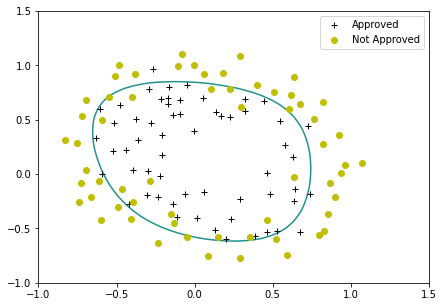

This plot shows the decision boundary for lambda=1


In [ ]:
#The decision boundary can be plot to separete the data
#into two subspaces corresponding to True (y=1) and False (y=0) values

#first plot the data again
pos = np.where(y==1)[0]  #positive result 1
neg = np.where(y==0)[0]       # negative result 0

#Note that this time we are using the extended X containing 1's due to intercept
plt.figure(figsize= (7,5) )
plt.plot(X[pos,1], X[pos,2], 'k+', label='Approved'  )
plt.plot(X[neg,1], X[neg,2], 'yo', label='Not Approved')
plt.legend()


#now the decision boundary
#requires calculation of X @ theta
#Here theta needs to be the theta_min reshaped to columns as originally
theta = (theta_min).reshape((n,1))
y= y.reshape((m,1))

#Note that now we will use the mapfeature giving x1 and x1 as numbers
# from that, the map will make 28 columns with all powers up to degree 6
#combinations of x1 and x2. The plot will again show x1 against x2 
#with y=1 (cross) or y=0 (dots) with different visual representation 

# making a grig
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))

for i in range(len(u_vals)):
    for j in range(len(v_vals)):
      z[i,j] = mapFeature(u_vals[i],v_vals[j], degree=6) @ theta   # X @ theta
#the mapfeature has now numbers as input for  x1 and x2
#that is fine becuse the mapFeature will convert them to numpy array


#now the decision boundary is not a line 
plt.contour(u_vals, v_vals, z.T, 0 ) #levels=[0]

plt.show()
print(f'This plot shows the decision boundary for lambda={LAMBDA}')


#Where is regularization?

$\lambda$ is the parameter controlling the regularization term. If it is sufficiently large, the learning parameters $\theta$ will have to be small since their product is a term in the cost function, which shall be minimized. The terminology for that is called 'penalization' of the parameters. If the learning parameters are submitted to a strict penalization, there will be an undeerfitting of the model. Setting $\lambda =0$ means removing the regularization term and increasing the chances of overfitting the model. Hence, for intermediate values of $\lambda$, we expect a behaviour between overfitting and underfitting. Ideally, we want to express the main features (complexity) without overfitting the model.

Let's see how the choice of $\lambda$ affects the decision boundary below.

In [ ]:
#Lets put together all the code before allowing to plot the decision boundary for different choices of LAMBDA

def plot_decisionBoundary(X, y, LAMBDA):

  from scipy import optimize

  
  theta = np.zeros((n,1))

#For this optimization, we need to reshape y and theta to become arrays!
  theta= theta.reshape((n,))
  y= y.reshape((m,))

  result = optimize.minimize(cost_functionReg, theta, args=(X,y, LAMBDA), method='Newton-CG',
                  jac = gradientReg, options={'maxiter': 400, 'disp':True } )

  theta_min = result['x']


  print(f' the minimum is achieved with (first terms only) theta = {theta_min[:5]} ')
  print(f' It shall, however, be expressed (first terms only) as a column \n {(theta_min).reshape((n,1))[:5]} ')


#restart the original shapes
  y= y.reshape((m,1))
  theta = (theta_min).reshape((n,1))

#alternatively
  #result2 = optimize.fmin_tnc(func= cost_function, x0= theta, fprime=gradient, args= (X, y) )


#first plot the data again
  pos = np.where(y==1)[0]  #positive result 1
  neg = np.where(y==0)[0]       # negative result 0

#Note that this time we are using the extended X containing 1's due to intercept
  plt.figure(figsize= (7,5) )
  plt.plot(X[pos,1], X[pos,2], 'k+', label='Approved'  )
  plt.plot(X[neg,1], X[neg,2], 'yo', label='Not Approved')
  plt.legend()


#now the decision boundary
#requires calculation of X @ theta
#Here theta needs to be the theta_min reshaped to columns as originally
  theta = (theta_min).reshape((n,1))
  y= y.reshape((m,1))

#Note that now we will use the mapfeature giving x1 and x1 as numbers
# from that, the map will make 28 columns with all powers up to degree 6
#combinations of x1 and x2. The plot will again show x1 against x2 
#with y=1 (cross) or y=0 (dots) with different visual representation 

# making a grig
  u_vals = np.linspace(-1,1.5,50)
  v_vals= np.linspace(-1,1.5,50)
  z=np.zeros((len(u_vals),len(v_vals)))

  for i in range(len(u_vals)):
      for j in range(len(v_vals)):
        z[i,j] = mapFeature(u_vals[i],v_vals[j], degree=6) @ theta   # X @ theta
#the mapfeature has now numbers as input for  x1 and x2
#that is fine becuse the mapFeature will convert them to numpy array


#now the decision boundary is not a line 
  plt.contour(u_vals, v_vals, z.T, 0 ) #levels=[0]

  plt.show()
  return print(f'See in the plot above the decision boundary for LAMBDA={LAMBDA} ')


         Current function value: 0.271677
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 1739
         Hessian evaluations: 0
 the minimum is achieved with (first terms only) theta = [  3.50055215  -0.21448266   1.36558177 -25.8411116  -10.67199524] 
 It shall, however, be expressed (first terms only) as a column 
 [[  3.50055215]
 [ -0.21448266]
 [  1.36558177]
 [-25.8411116 ]
 [-10.67199524]] 


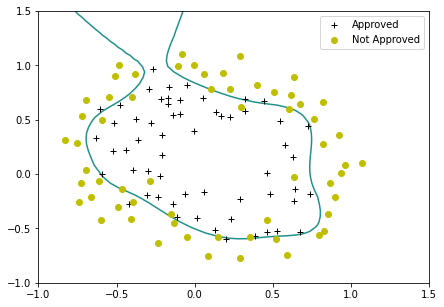

See in the plot above the decision boundary for LAMBDA=0 


In [ ]:
#lambda=0 will remove the regularization term causing overfitting 
plot_decisionBoundary(X,y,0)

Optimization terminated successfully.
         Current function value: 0.394594
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 470
         Hessian evaluations: 0
 the minimum is achieved with (first terms only) theta = [ 2.75388983  1.80722074  2.95667301 -4.2145064  -3.37951923] 
 It shall, however, be expressed (first terms only) as a column 
 [[ 2.75388983]
 [ 1.80722074]
 [ 2.95667301]
 [-4.2145064 ]
 [-3.37951923]] 


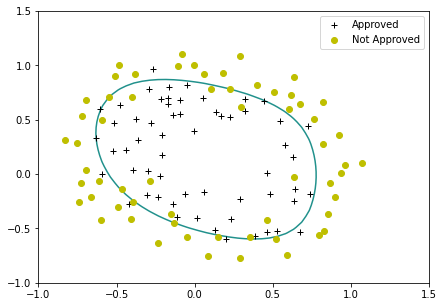

See in the plot above the decision boundary for LAMBDA=0.1 


In [ ]:
plot_decisionBoundary(X,y, 0.1)

Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 38
         Hessian evaluations: 0
 the minimum is achieved with (first terms only) theta = [ 0.32617735 -0.00815026  0.16579746 -0.44671816 -0.11177313] 
 It shall, however, be expressed (first terms only) as a column 
 [[ 0.32617735]
 [-0.00815026]
 [ 0.16579746]
 [-0.44671816]
 [-0.11177313]] 


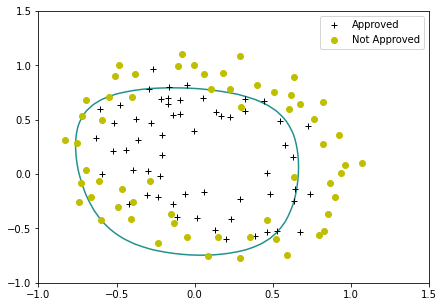

See in the plot above the decision boundary for LAMBDA=10 


In [ ]:
plot_decisionBoundary(X,y, 10)

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 18
         Hessian evaluations: 0
 the minimum is achieved with (first terms only) theta = [ 0.02188262 -0.01748158  0.00571077 -0.05516937 -0.0131485 ] 
 It shall, however, be expressed (first terms only) as a column 
 [[ 0.02188262]
 [-0.01748158]
 [ 0.00571077]
 [-0.05516937]
 [-0.0131485 ]] 


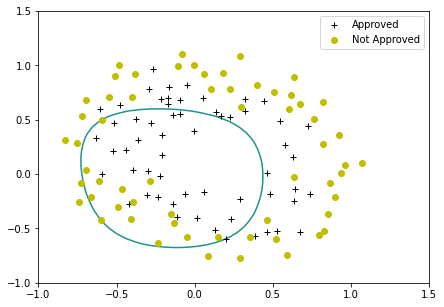

See in the plot above the decision boundary for LAMBDA=100 


In [ ]:
#A sufficiently large value of LAMBDA will cause underfitting
plot_decisionBoundary(X,y, 100)

#Accuracy of the model

One always need to check whether the results are in agreement with
what we expect, namely, the ability of the model to get close as possible to the actual data we will encounter. Here we have only a training set, but we can still check the accuracy of the model for this particular set. 

In [ ]:
theta = (theta_min).reshape((n,1)) #this theta was obtained for LAMBDA=1 only

def predic(theta, X):
  """Given predictors and parameters, find the prediction for the target """
  m = np.size(X,0)
  p = np.zeros((m,1))
  for (i, value) in enumerate(X):
    prob = sigmoid(np.dot(value, theta))
    if prob >= 1/2:
      p[i] = 1
    else:
      p[i] = 0  
  return p   

 ## alternatively: 
  # prob = sigmoid(np.dot(X, theta))
  # for i in range(m): 
  #   if prob[i] >= 0.5:
  #     p[i] = 1
  #   else:
  #     p[i] = 0  
  # return p       

In [ ]:
print(f'The train accuracy is { np.mean(predic(theta, X )== y )*100}%')

The train accuracy is 83.05084745762711%


Note that ScikitLearn will give a very close value to the one obtained in our model above. In fact, there is an automatic regulariation process taken into account where the penalty can be chosen. We have used 'l2', which has to do with the square-integrable norm, but one can also select 'l1', for instance, related to the L1 (space of absolutely integrable functions) norm

In [ ]:
from sklearn.linear_model import LogisticRegression
y = y.flatten()
#Lets use our extended vector X and remove sklearn bias
lreg = LogisticRegression(fit_intercept=False, solver='newton-cg', penalty='l2') #using 'newton-cg' instead of default 'liblinear'
lreg = lreg.fit(X,y)

lreg.score(X, y)
lreg_acc = lreg.score(X, y) * 100

y = y.reshape((m,1)) #back to original shape
print('The coefficients are: \n', lreg.coef_)
print(f'Accuracy is {lreg_acc}')

The coefficients are: 
 [[ 1.14213575  0.60132186  1.16718326 -1.87174359 -0.91573503 -1.26953757
   0.12668235 -0.3687234  -0.3451782  -0.17377628 -1.42386177 -0.04856119
  -0.6064216  -0.26932201 -1.16315301 -0.24310264 -0.20706754 -0.0431884
  -0.28028106 -0.28695055 -0.46910709 -1.03618515  0.02923411 -0.29262323
   0.01736154 -0.32897195 -0.13796124 -0.93198618]]
Accuracy is 82.20338983050848


In [ ]:
#Instead of ridge regression (L2 norm), use lasso (L1 norm)
#Because lasso can give sparse results for thetas (regression shrinkage, Tibshirani 1996),
#we expect many features from this polynomial map of order 6 being irrelevant, that is, associated with zero weights.

from sklearn.linear_model import LogisticRegression
y = y.flatten()
#Lets use our extended vector X and remove sklearn bias
lreg = LogisticRegression(fit_intercept=False, solver='saga', penalty='l1', max_iter=1000) #using 'saga' instead of default 'liblinear'
lreg = lreg.fit(X,y)

lreg.score(X, y)
lreg_acc = lreg.score(X, y) * 100

y = y.reshape((m,1)) #back to original shape
print('The coefficients are: \n', lreg.coef_)
print(f'Accuracy is {lreg_acc}')
#print(lreg.intercept_)

#Note that only seven weights are nonzero!! That is, six of them come from 'up to 2nd order'
#and an extra one of higher order (fourth-order)! In that sense, the Lasso penalty is useful for selecting features.

The coefficients are: 
 [[ 1.86962036  0.68624143  1.27997909 -4.8596602  -1.62114321 -2.34910406
   0.          0.          0.          0.          0.          0.
   0.          0.         -2.35794942  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
Accuracy is 79.66101694915254


In [ ]:
#if we only give the features x1 and x2 (x), without creating a mapFeature with polynomial terms
#of higher orders, the LogisticRegression model will have a low accuracy

from sklearn.linear_model import LogisticRegression
#y = y.flatten()
#Lets use our extended vector X and remove sklearn bias
lreg = LogisticRegression(fit_intercept=True, solver='newton-cg', penalty='l2') #using 'newton-cg' instead of default 'liblinear'
lreg = lreg.fit(x,y)

lreg.score(x, y)
lreg_acc = lreg.score(x, y) * 100

#y = y.reshape((m,1)) #back to original shape
print('The coefficients are: \n', lreg.coef_)
print('The intercept is', lreg.intercept_)
print(f'Accuracy is {lreg_acc}')

The coefficients are: 
 [[-0.26541818 -0.01162139]]
The intercept is [-0.01740678]
Accuracy is 54.23728813559322


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Decision boundary for more features

While the first case with only two features (plus intercept) did not make use of regularization, the second case, where we needed more features to reproduce a non-linear boundary decision, involved regularization and has a extra parameter denoted LAMBDA. If we write a single function to plot any of these two cases, we will set LAMBDA to be a constant already chosen, otherwise we would need to include the optimization inside this function to find all the new weights $\theta$'s.   

In [ ]:
#Make a function that will plot the decision boundary 
#taking into account if there are two features or more

#If X is a mx3 matrix, we call first plot, but
#if X  is more general of dimension mXn for larger n, we need to adjust the plot (LAMBDA already chosen).   

def plotDecisionBoundary(theta, X, y):


 if (X.shape)[1] <= 3:
   

#   #first plot the data again
   pos = np.where(y==1)[0] #positive result 1
   neg = np.where(y==0)[0]       # negative result 0
#      = np.asarray(y== ).nonzero()[0]   #alternatively
                                          #nonzero(a): Return the indices of the elements that are non-zero.
                                          #Returns a tuple of arrays, one for each dimension of `a`,
                                          #containing the indices of the non-zero elements in that dimension.

#   #Note that this time we are using the extended X containing 1's due to intercept
   plt.plot(X[pos,1], X[pos,2], 'k+', label='Admitted'  )
   plt.plot(X[neg,1], X[neg,2], 'yo', label='Not Admitted')
   plt.legend()


#   #now the decision boundary


#   #select min and max points of the data for feature 1 (plus a bit of extra space for margin)
   xpart = np.array([ min(X[:,1])-3  ,  max(X[:,1])+3 ]) 

# #NumPy supports smart elementwise operations so we do not really need
# #to take care of the elemetwise operations  such as 1./theta[]
# #where we would divide a number by a matrix but elementwise  
# #same would work with 1/theta[]

   ypart = -1./(theta[2])* (theta[0] + xpart* theta[1]   )

   plt.plot(xpart, ypart, label='Decision Boundary')
   plt.show()

 else:                               #for matrices of type (MxN)
    
    pos = np.where(y==1)[0] # positive result 1
    neg = np.where(y==0)[0]       # negative result 0
    plt.plot(X[pos,1], X[pos,2], 'k+', label='Approved'  )
    plt.plot(X[neg,1], X[neg,2], 'yo', label='Not Approved')

    features1 = np.linspace(-1,1.5,100)
    features2 = np.linspace(-1,1.5,100)
    z=np.zeros((len(u_vals),len(v_vals)))

    for i in range(len(u_vals)):
       for j in range(len(v_vals)):
        z[i,j] = mapFeature(u_vals[i],v_vals[j], degree=6) @ theta   # X @ theta
#the mapfeature has now numbers as input for  x1 and x2
#that is fine becuse the mapFeature will convert them to numpy array
#now the decision boundary is not a line 
    plt.contour(u_vals, v_vals, z.T, 0 ) #levels=[0]

    plt.show()
 return print(f'See in the plot above the decision boundary for LAMBDA={LAMBDA} ')

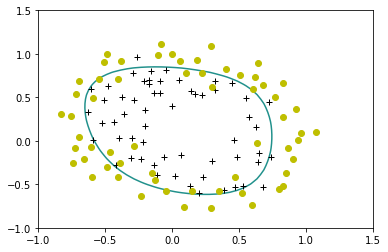

See in the plot above the decision boundary for LAMBDA=1 


In [ ]:
plotDecisionBoundary(theta, X, y)